# TiVo Segmentation

### How to segment market?
- What do people want?
    - what features do they care about?
    - how much storage do they need?
- How can I reach them?
    - can I communicate with them specifically?
- How should it be priced?
    - will early adopters spend a lot of money on it? what about late adopters?
    - monthly fee vs lifetime fee?
    - long term major rev source: data 
    - price for a model: 500

### Qs that might have been interesting
- Their values/ identity
- How they interact with TV service
    - When they watch
    - Who they watch with
    - What type of things do they watch
- Problems they currently have w TV service
    - weird, they complained about timing and interruptions w tv but most people valued recording to watch w family?
- How they feel about each feature
    - timing control
    - play and record
    - option to skip commercial
    - open access to programs
    - search for and record shows
    - auto record shows
    - recommendations for shows
- How much they'd be willing to pay for the product

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing

In [2]:
# import and check data
df = pd.read_csv("TiVoData.csv")
df = df.drop(df.index[len(df)-1])
df = df.drop(df.index[len(df)-1])
df = df.drop(df.index[len(df)-1])
df.head()

ID  Gender Marital Status   Work Status Education  \
0  1.0    male        married  professional      none   
1  2.0    male         single          none      none   
2  3.0    male        married  professional        BA   
3  4.0    male        married          none       PhD   
4  5.0  female         single          none      none   

   Annual Income (x1000 $)   Age       Location Purchasing Decision-maker  \
0                     49.0  30.0        Florida                    family   
1                     46.0  36.0        Alabama                    single   
2                     58.0  66.0  Massachusetts                    family   
3                     51.0  78.0       New York                    family   
4                     46.0  52.0        Montana                    single   

         Purchasing Location  Monthly Electronics Spend  \
0  mass-consumer electronics                       35.0   
1  mass-consumer electronics                       35.0   
2           specialty stores                       64.0   
3  mass-consumer electronics                       33.0   
4  mass-consumer electronics                       45.0   

   Monthly Household Spend  Purchasing Frequency (every x months)  \
0                    150.0                                   13.0   
1                    163.0                                   26.0   
2                    103.0                                   13.0   
3                    154.0                                   22.0   
4                    161.0                                   47.0   

  Technology Adoption  TV Viewing (hours/day)  \
0                late                     2.0   
1                late                    10.0   
2               early                     0.0   
3                late                     5.0   
4                late                     2.0   

                             Favorite feature  
0  saving favorite shows to watch as a family  
1  saving favorite shows to watch as a family  
2                               time shifting  
3  saving favorite shows to watch as a family  
4  saving favorite shows to watch as a family

In [20]:
# convert string factors to type: category

dfE = pd.read_csv("TiVoData.csv")
dfE = dfE.drop(dfE.index[len(dfE)-1])
dfE = dfE.drop(dfE.index[len(dfE)-1])
dfE = dfE.drop(dfE.index[len(dfE)-1])
df.shape
dfE["Gender"] = dfE["Gender"].astype("category")
dfE["Marital Status"] = dfE["Marital Status"].astype("category")
dfE["Work Status"] = dfE["Work Status"].astype("category")
dfE["Education"] = dfE["Education"].astype("category")
dfE["Location"] = dfE["Location"].astype("category")
dfE["Purchasing Decision-maker"] = dfE["Purchasing Decision-maker"].astype("category")
dfE["Purchasing Location"] = dfE["Purchasing Location"].astype("category")
dfE.dtypes



ID                                        float64
Gender                                   category
Marital Status                           category
Work Status                              category
Education                                category
Annual Income (x1000 $)                   float64
Age                                       float64
Location                                 category
Purchasing Decision-maker                category
Purchasing Location                      category
Monthly Electronics Spend                 float64
Monthly Household Spend                   float64
Purchasing Frequency (every x months)     float64
Technology Adoption                        object
TV Viewing (hours/day)                    float64
Favorite feature                           object
dtype: object

In [21]:
# encode qualitative factors

dfE["Gender"] = dfE["Gender"].cat.codes
dfE["Marital Status"] = dfE["Marital Status"].cat.codes
dfE["Work Status"] = dfE["Work Status"].cat.codes
dfE["Education"] = dfE["Education"].cat.codes
dfE["Location"] = dfE["Location"].cat.codes
dfE["Purchasing Decision-maker"] = dfE["Purchasing Decision-maker"].cat.codes
dfE["Purchasing Location"] = dfE["Purchasing Location"].cat.codes
dfE.head()

ID  Gender  Marital Status  Work Status  Education  \
0  1.0       1               0            1          3   
1  2.0       1               1            0          3   
2  3.0       1               0            1          0   
3  4.0       1               0            0          2   
4  5.0       0               1            0          3   

   Annual Income (x1000 $)   Age  Location  Purchasing Decision-maker  \
0                     49.0  30.0         8                          0   
1                     46.0  36.0         0                          1   
2                     58.0  66.0        20                          0   
3                     51.0  78.0        31                          0   
4                     46.0  52.0        25                          1   

   Purchasing Location  Monthly Electronics Spend  Monthly Household Spend  \
0                    1                       35.0                    150.0   
1                    1                       35.0                    163.0   
2                    3                       64.0                    103.0   
3                    1                       33.0                    154.0   
4                    1                       45.0                    161.0   

   Purchasing Frequency (every x months) Technology Adoption  \
0                                   13.0                late   
1                                   26.0                late   
2                                   13.0               early   
3                                   22.0                late   
4                                   47.0                late   

   TV Viewing (hours/day)                            Favorite feature  
0                     2.0  saving favorite shows to watch as a family  
1                    10.0  saving favorite shows to watch as a family  
2                     0.0                               time shifting  
3                     5.0  saving favorite shows to watch as a family  
4                     2.0  saving favorite shows to watch as a family

<IPython.core.display.Javascript object>


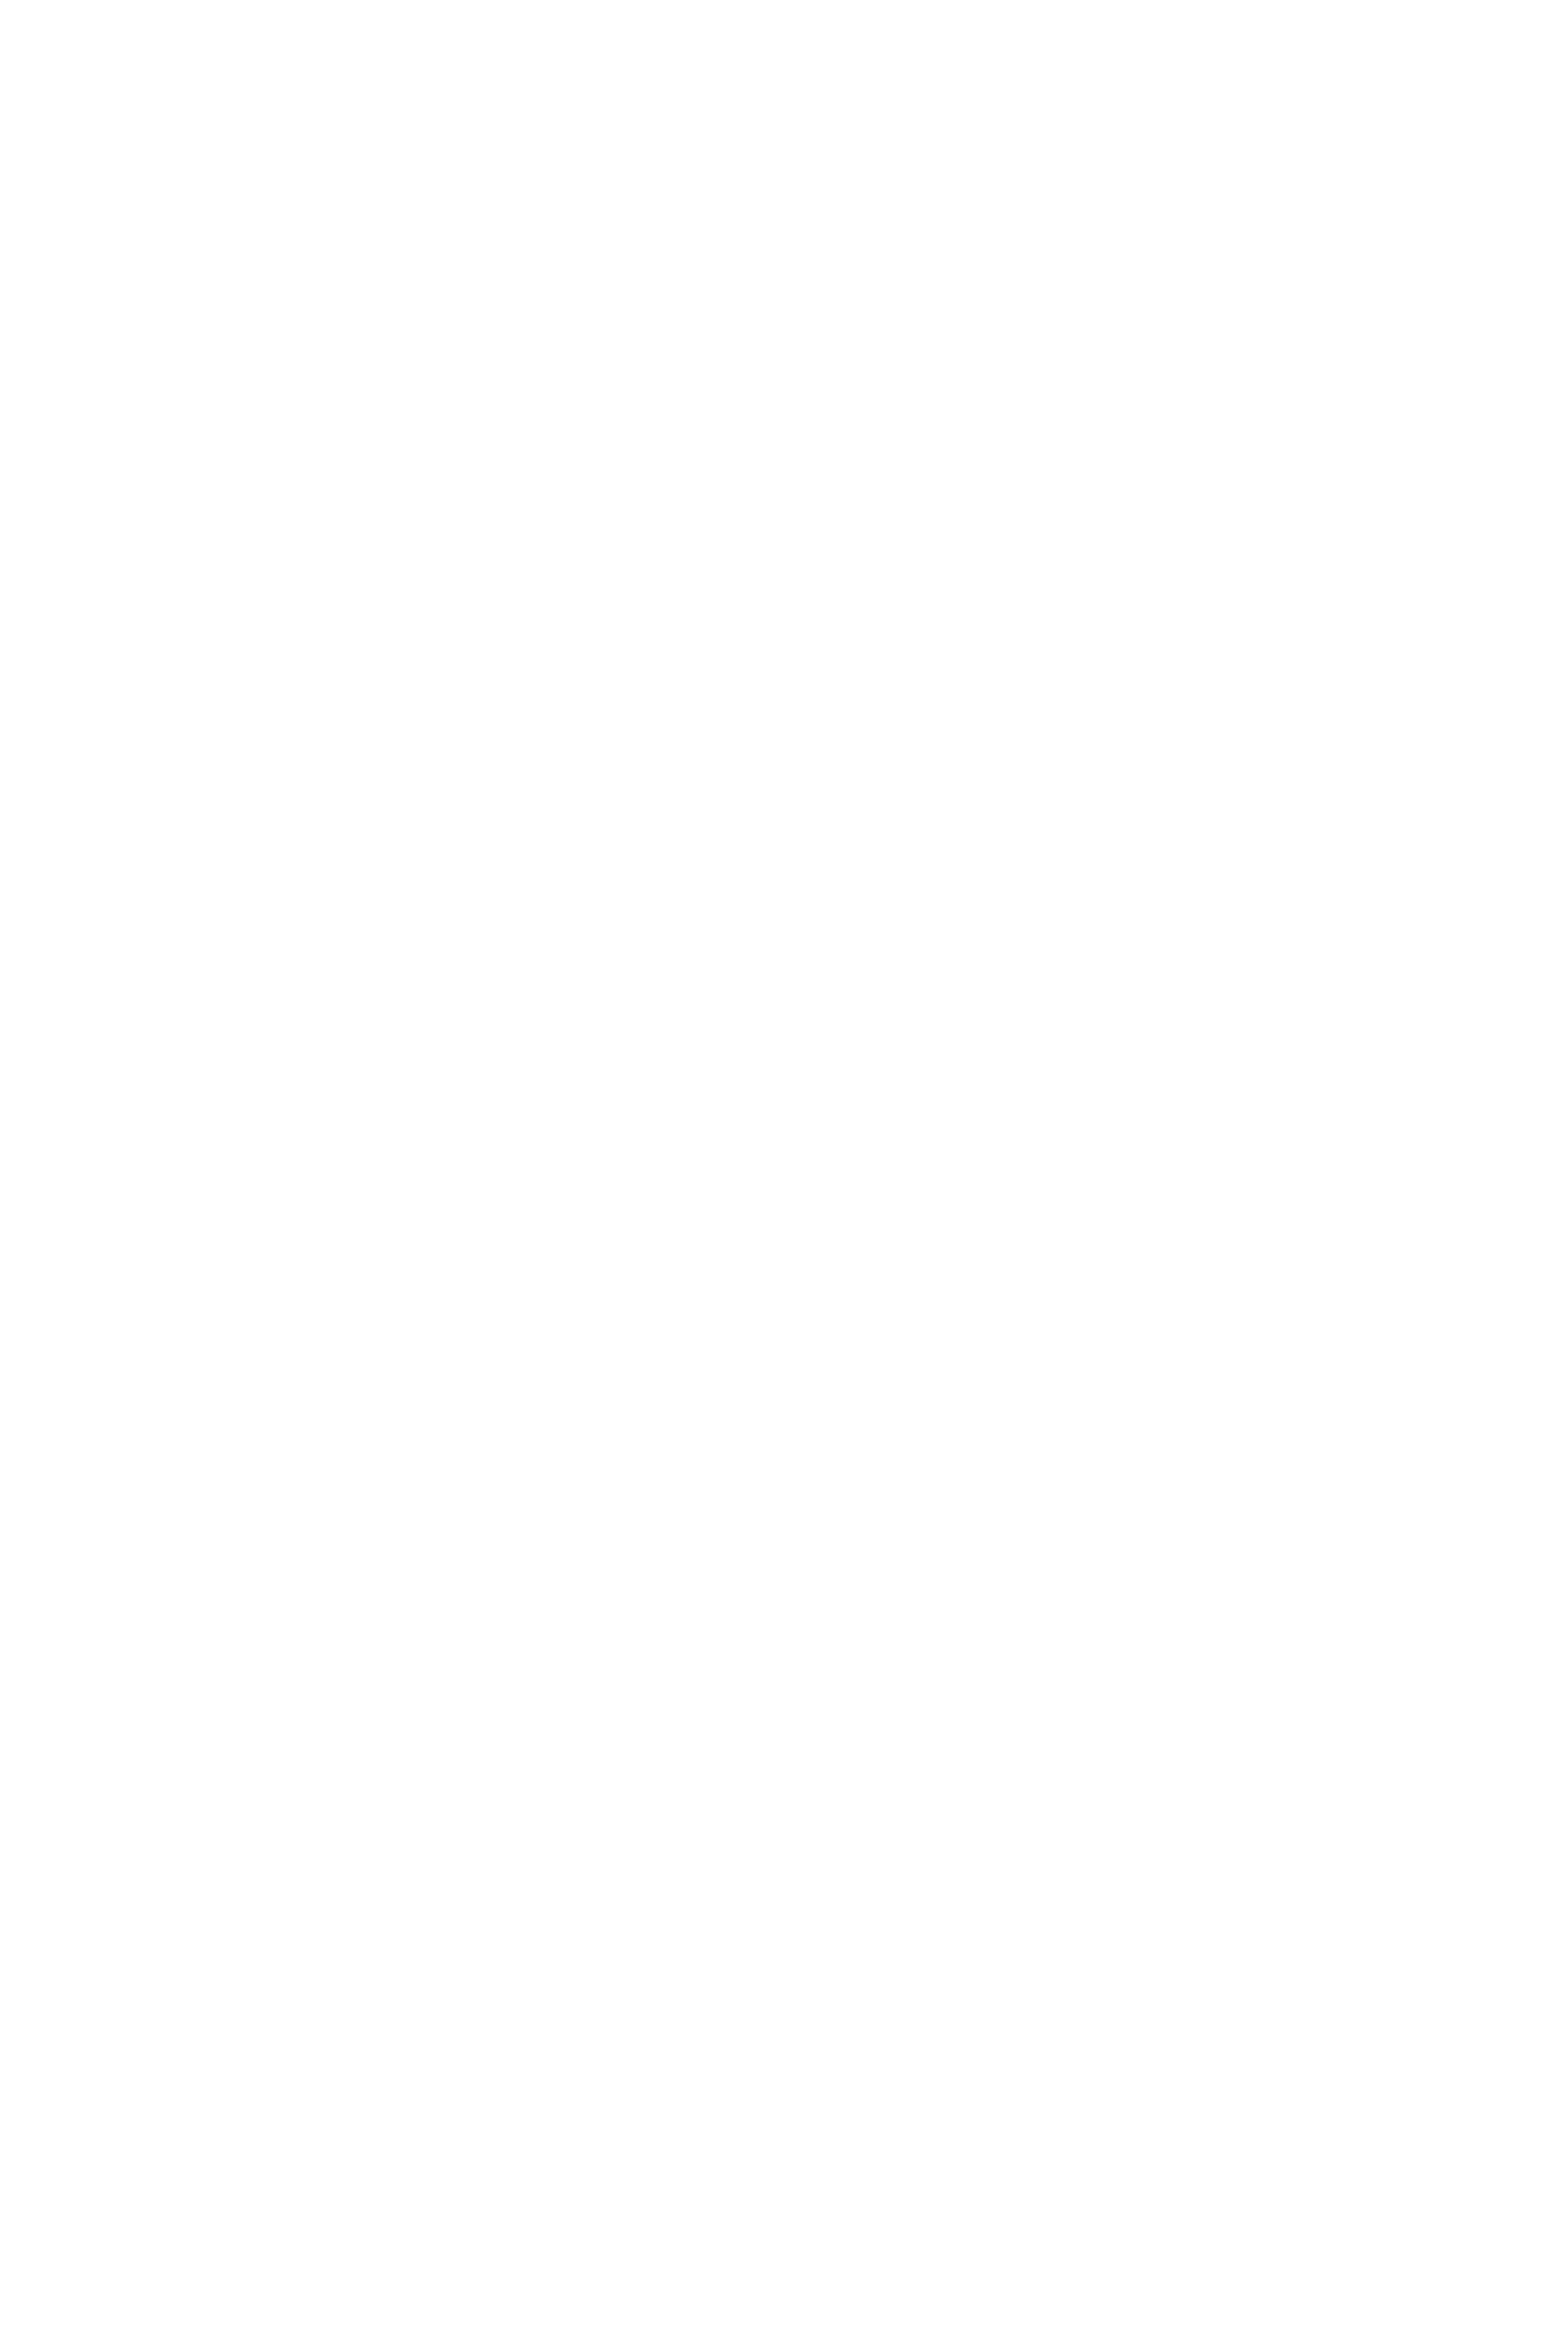

C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: num must be 1 <= num <= 0, not 1

In [22]:
%matplotlib notebook
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dfE.columns)//3, 3, figsize=(10, 15))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dfE.hist(column = dfE.columns[i], ax=axis)
        i = i+1

<IPython.core.display.Javascript object>


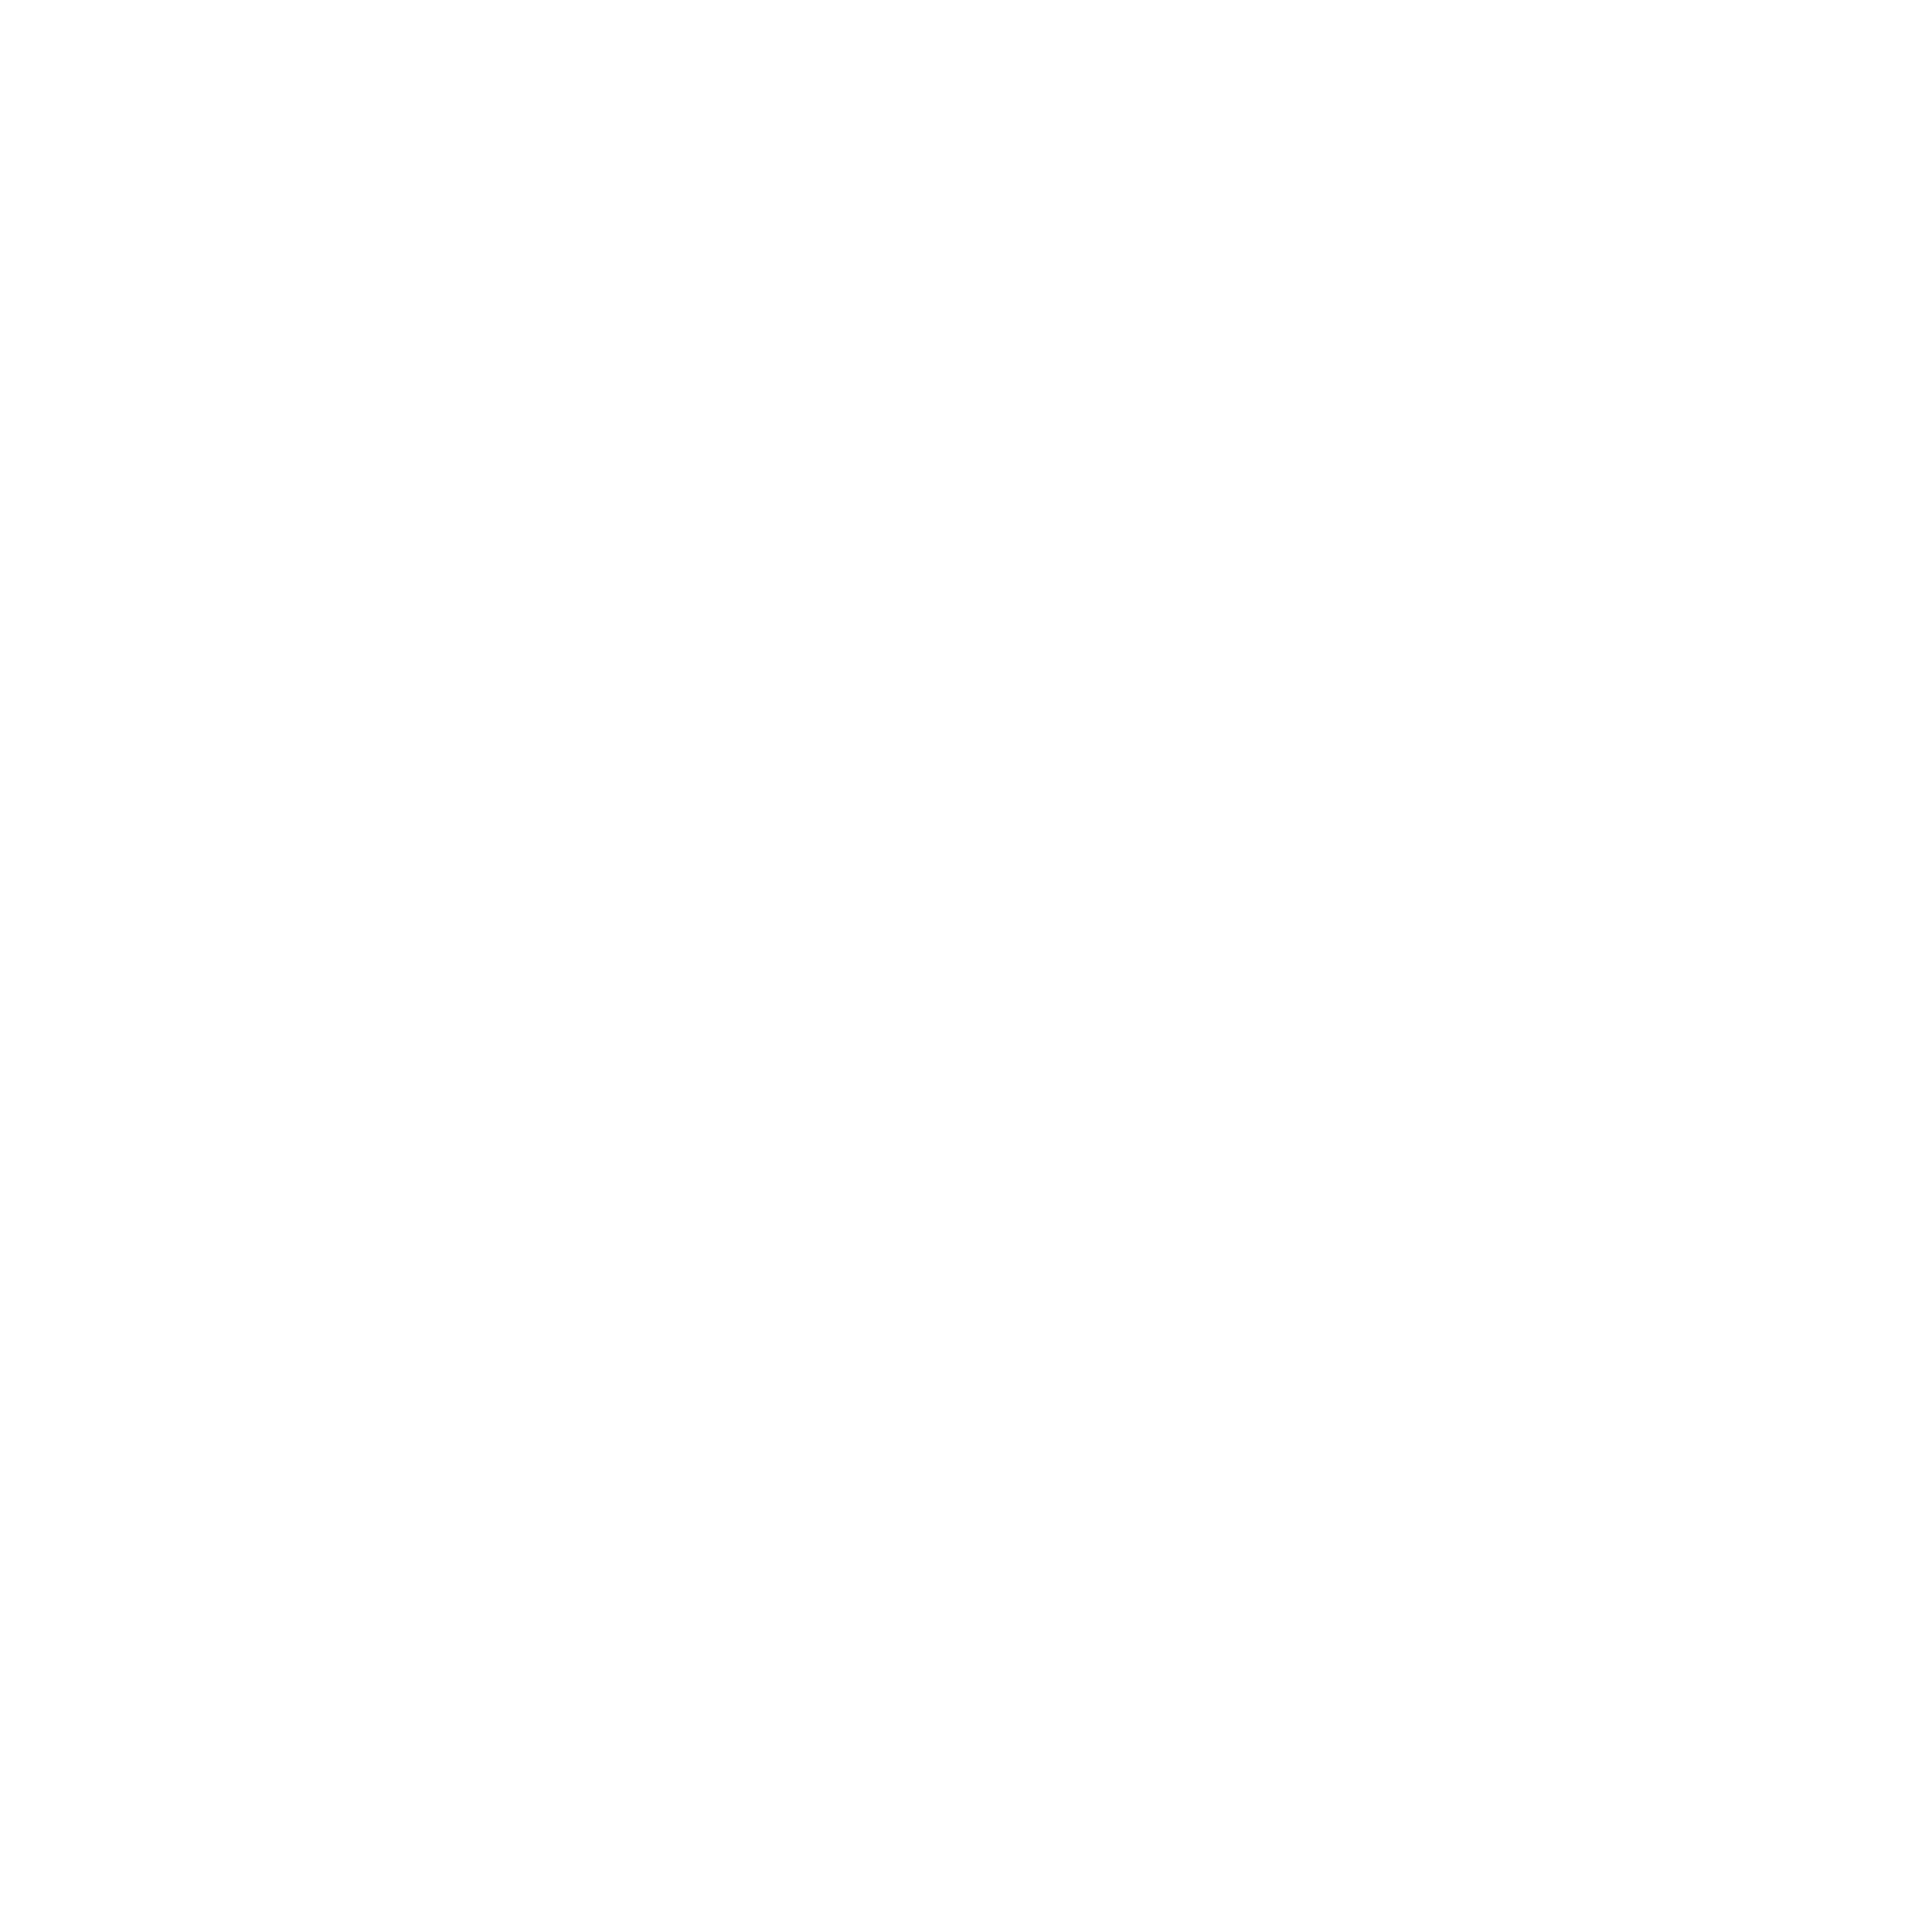

KeyError: "['Technology Adoption'] not in index"

In [23]:
%matplotlib notebook
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dfE.columns)//3, 3, figsize=(10, 10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dfE.boxplot(column = dfE.columns[i], ax=axis)
        i = i+1

In [ ]:
# remove outliers in annual income

dfE[dfE["Annual Income (x1000 $)"] >500]

dfET = dfE.drop(dfE.index[440])
dfET = dfET.drop(dfET.index[921])

dfT = df.drop(df.index[440])
dfT = dfT.drop(dfT.index[921])

In [ ]:
dfET.describe()

In [ ]:
corr = dfET.corr()**2
corr.style.background_gradient()

### Factors that can be eliminated (can be explained by another)

Monthly Household Spend (approximated by Monthly Electronics Spend)


Annual Income (approximated by Monthly Electronics Spend)


TV Viewing (approsimated by Tech Adoption)

In [ ]:
# i left tv viewing in just cause its an important var and i want to see it later

dfTx = dfT.drop(columns=["Monthly Household Spend", "Annual Income (x1000 $)"])
dfETx = dfET.drop(columns=["Monthly Household Spend", "Annual Income (x1000 $)"])
dfETx.head()

In [ ]:
%matplotlib notebook
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dfETx.columns)//3, 3, figsize=(10, 10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dfETx.hist(column = dfETx.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
%matplotlib notebook
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(dfETx.columns)//3, 3, figsize=(10, 10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dfETx.boxplot(column = dfETx.columns[i], ax=axis)
        i = i+1

### Understanding Factors
- monthly electronics/household spend has a few high spending outliers clustered together (right skew)
- TV viewing also has a few high watching outliers


*intersts: perhaps the outliers across these 2 factors are related?*

### simplifying through similar groups

In [24]:
# discount and retail
discNRet = dfTx.loc[(dfTx["Purchasing Location"] == "discount") | (dfTx["Purchasing Location"] == "retail")]
discNRet.head()

ID  Gender Marital Status   Work Status Education   Age       Location  \
5    6.0  female        married          none        BA  72.0     New Jersey   
6    7.0    male        married  professional      none  62.0     California   
7    8.0    male        married          none      none  30.0  New Hampshire   
9   10.0  female        married  professional      none  59.0          Idaho   
10  11.0  female         single  professional       PhD  25.0        Florida   

   Purchasing Decision-maker Purchasing Location  Monthly Electronics Spend  \
5                     single              retail                       14.0   
6                     single            discount                       18.0   
7                     single              retail                       23.0   
9                     family            discount                       16.0   
10                    single            discount                       38.0   

    Purchasing Frequency (every x months) Technology Adoption  \
5                                    32.0               early   
6                                    41.0               early   
7                                     9.0               early   
9                                    25.0               early   
10                                    2.0               early   

    TV Viewing (hours/day)                  Favorite feature  
5                      1.0                     time shifting  
6                      0.0                       cool gadget  
7                      1.0                  schedule control  
9                      0.0                  schedule control  
10                     6.0  programming/interactive features

<IPython.core.display.Javascript object>


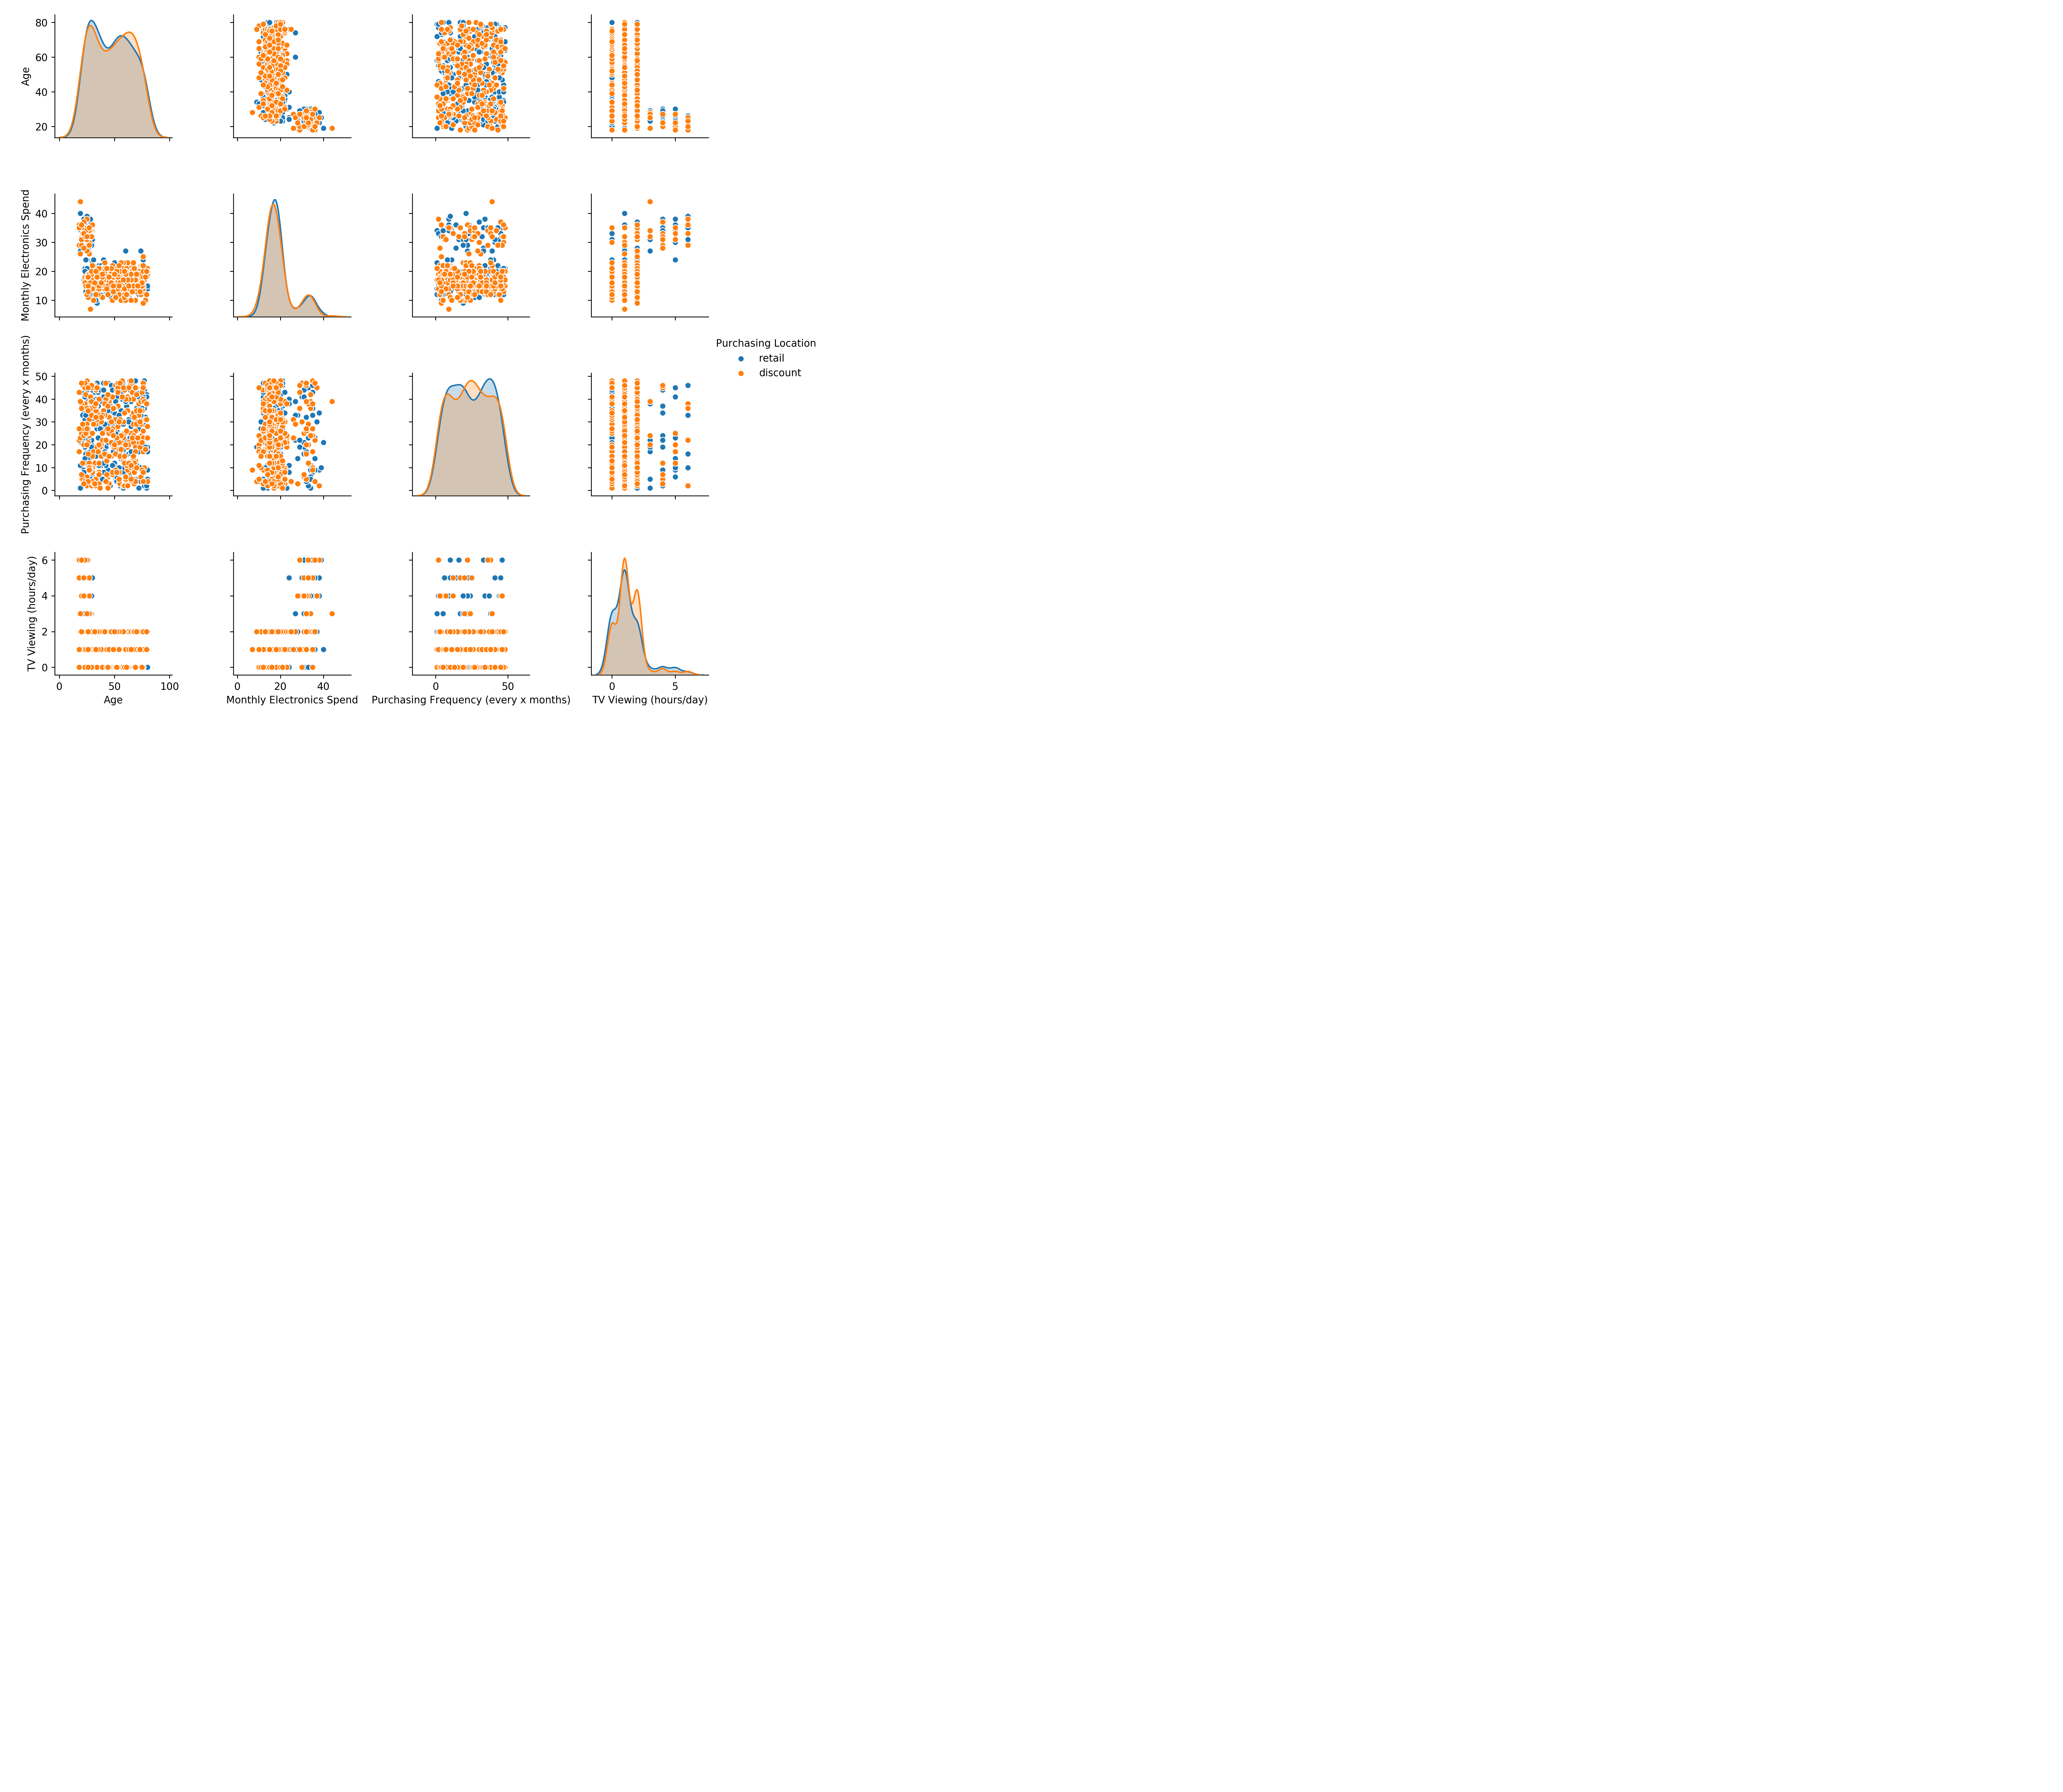

<IPython.core.display.Javascript object>


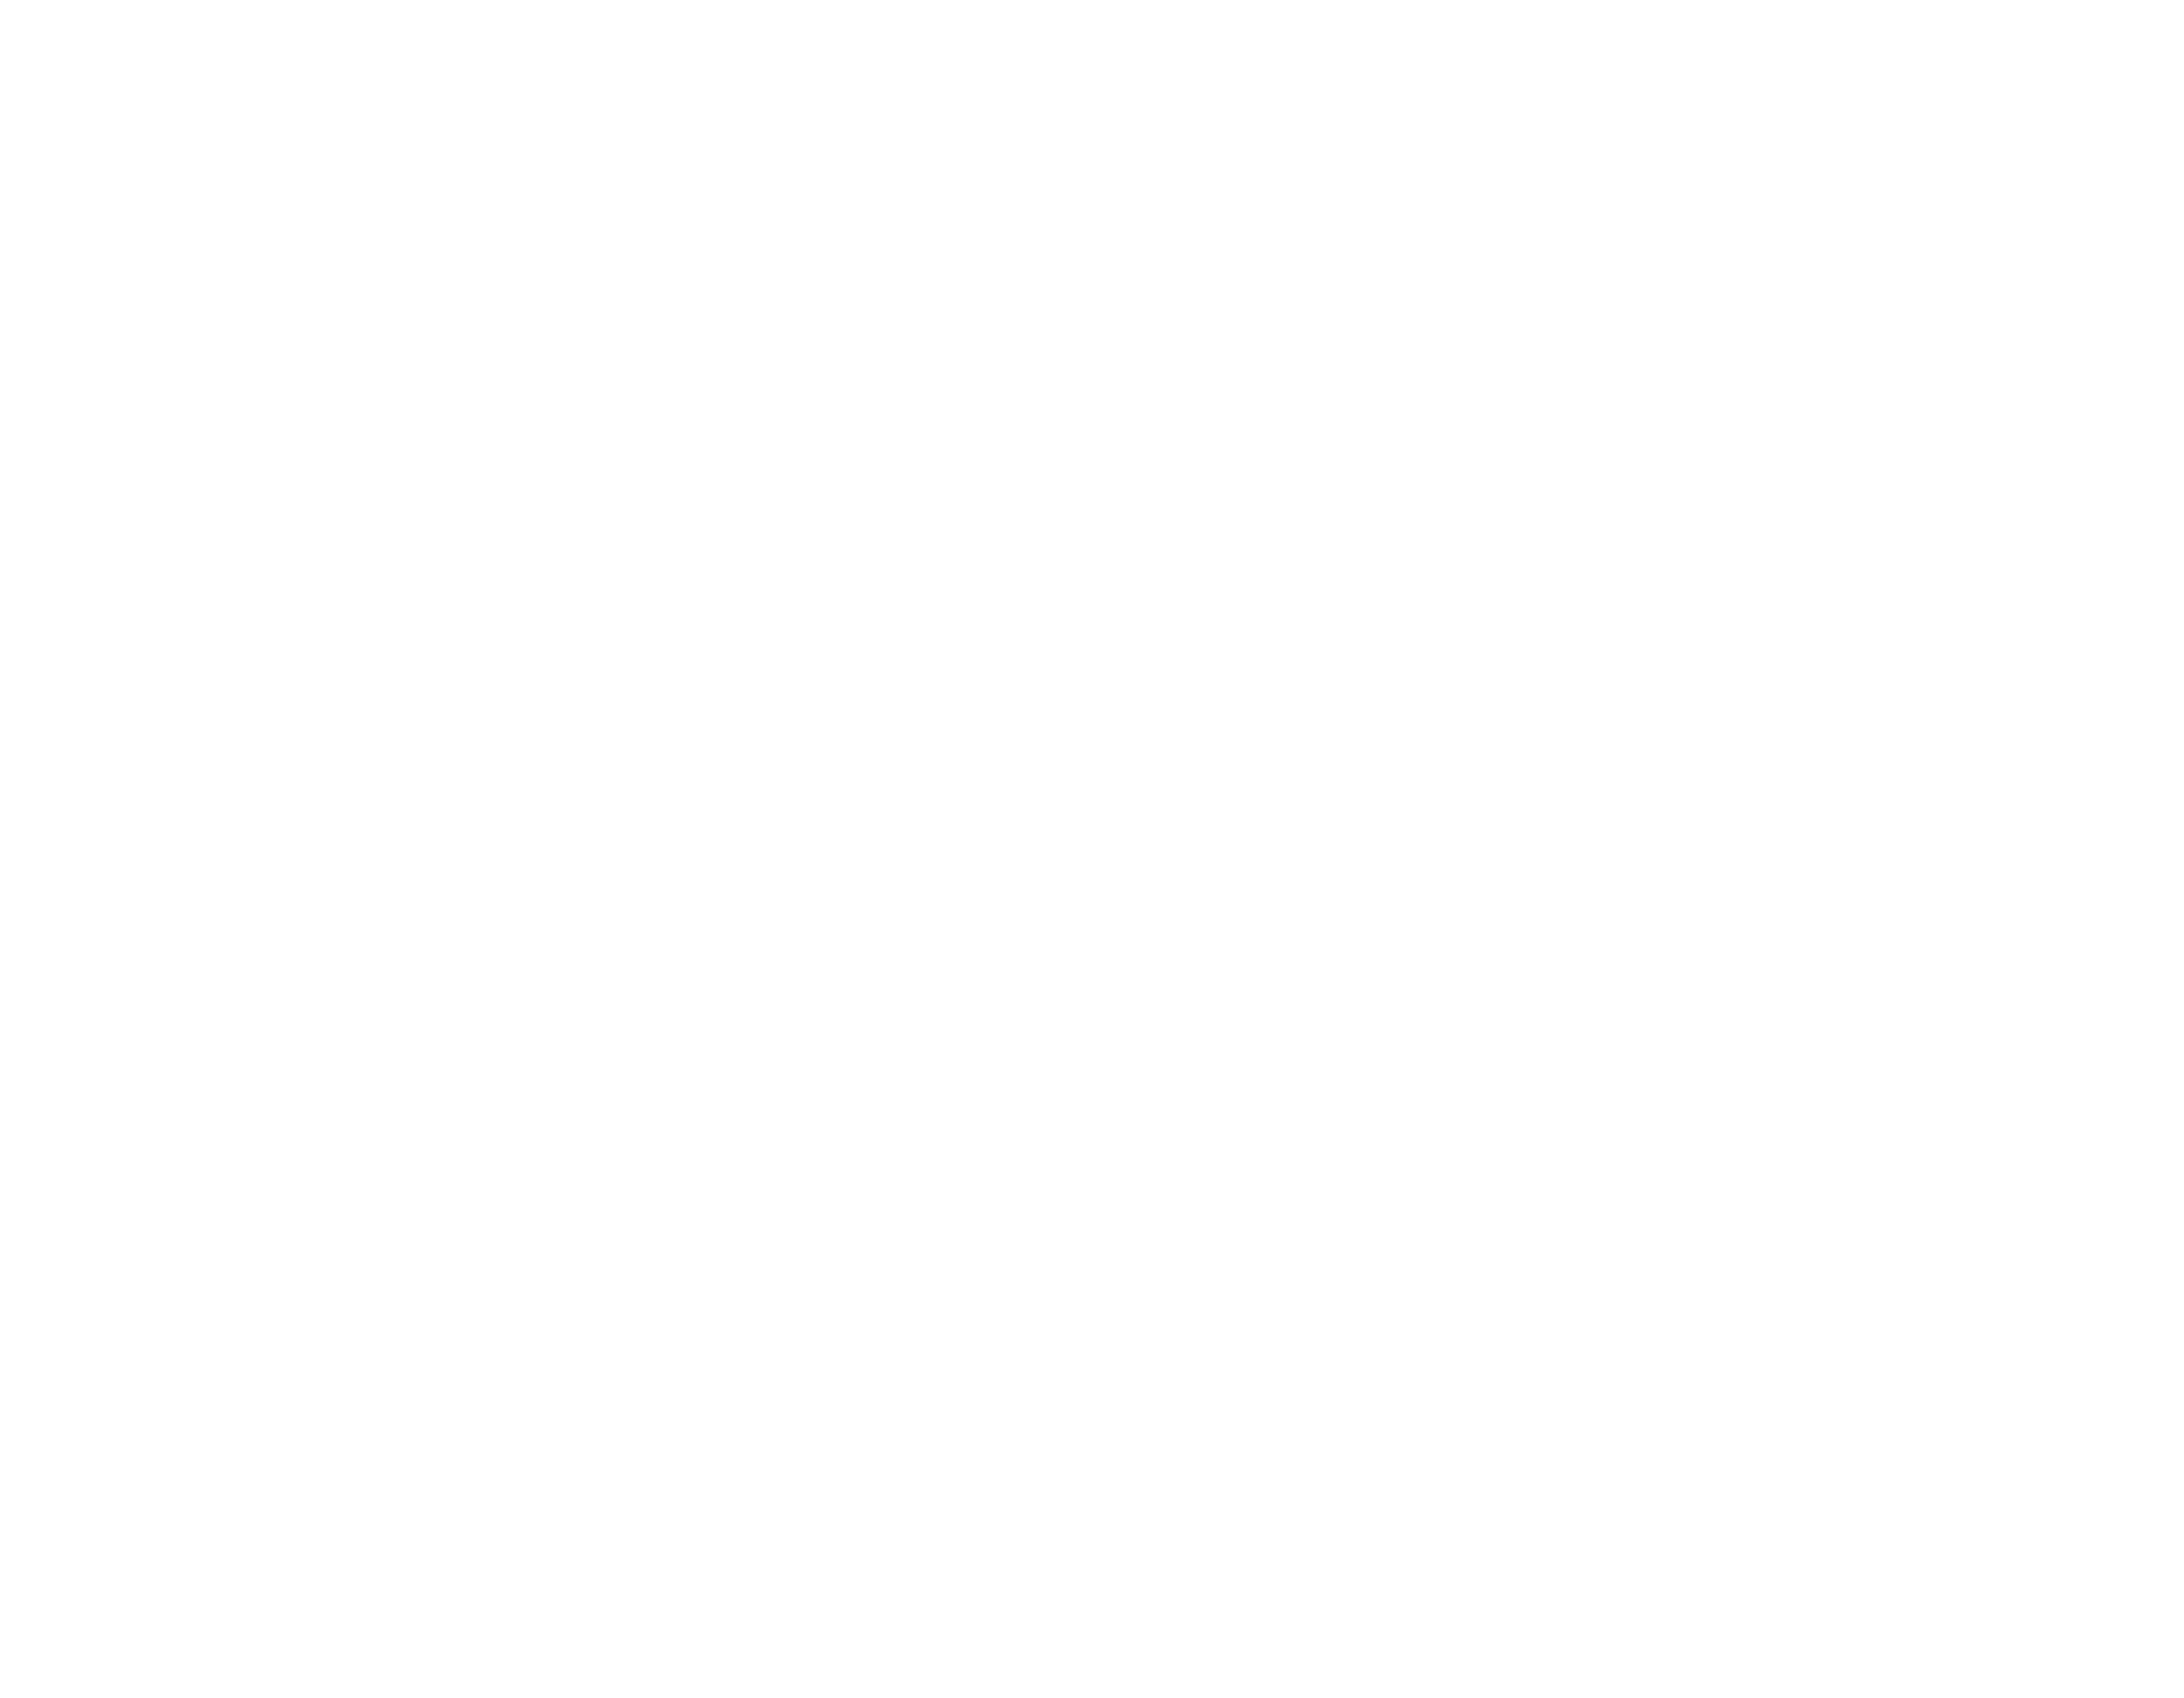

In [25]:
sns.pairplot(discNRet.loc[:, discNRet.columns != 'ID'],hue = "Purchasing Location")
sns.pairplot(discNRet.loc[:, discNRet.columns != 'ID'],hue = "Favorite feature")

In [38]:
# cool gadget, schedule control, time shifting

coolT = dfTx.loc[(dfTx["Favorite feature"] == "cool gadget") | (dfTx["Favorite feature"] == "schedule control") | (dfTx["Favorite feature"] == "time shifting")]
coolT.head()

ID  Gender Marital Status   Work Status Education   Age       Location  \
2  3.0    male        married  professional        BA  66.0  Massachusetts   
5  6.0  female        married          none        BA  72.0     New Jersey   
6  7.0    male        married  professional      none  62.0     California   
7  8.0    male        married          none      none  30.0  New Hampshire   
8  9.0    male        married  professional      none  60.0  Massachusetts   

  Purchasing Decision-maker Purchasing Location  Monthly Electronics Spend  \
2                    family    specialty stores                       64.0   
5                    single              retail                       14.0   
6                    single            discount                       18.0   
7                    single              retail                       23.0   
8                    family    specialty stores                       74.0   

   Purchasing Frequency (every x months) Technology Adoption  \
2                                   13.0               early   
5                                   32.0               early   
6                                   41.0               early   
7                                    9.0               early   
8                                    1.0               early   

   TV Viewing (hours/day)  Favorite feature  
2                     0.0     time shifting  
5                     1.0     time shifting  
6                     0.0       cool gadget  
7                     1.0  schedule control  
8                     0.0  schedule control

In [26]:
sns.pairplot(coolT.loc[:, coolT.columns != 'ID'],hue = "Favorite feature")
sns.pairplot(coolT.loc[:, coolT.columns != 'ID'],hue = "Purchasing Location")

NameError: name 'coolT' is not defined

In [17]:
dfETx.head()

ID  Gender  Marital Status  Work Status  Education   Age  Location  \
0  1.0       1               0            1          3  30.0         8   
1  2.0       1               1            0          3  36.0         0   
2  3.0       1               0            1          0  66.0        20   
3  4.0       1               0            0          2  78.0        31   
4  5.0       0               1            0          3  52.0        25   

   Purchasing Decision-maker  Purchasing Location  Monthly Electronics Spend  \
0                          0                    1                       35.0   
1                          1                    1                       35.0   
2                          0                    3                       64.0   
3                          0                    1                       33.0   
4                          1                    1                       45.0   

   Purchasing Frequency (every x months) Technology Adoption  \
0                                   13.0                late   
1                                   26.0                late   
2                                   13.0               early   
3                                   22.0                late   
4                                   47.0                late   

   TV Viewing (hours/day)                            Favorite feature  
0                     2.0  saving favorite shows to watch as a family  
1                    10.0  saving favorite shows to watch as a family  
2                     0.0                               time shifting  
3                     5.0  saving favorite shows to watch as a family  
4                     2.0  saving favorite shows to watch as a family

In [ ]:
### cleaning up the dataframe 
dfSimplified = dfTx.copy()
# by disc = retail
dfSimplified = dfSimplified.replace("retail", "discount & retail")
dfSimplified = dfSimplified.replace("discount", "discount & retail")


# by cool gadget = schedule control = time shifting
dfSimplified = dfSimplified.replace("cool gadget", "timing control")
dfSimplified = dfSimplified.replace("time shifting", "timing control")
dfSimplified = dfSimplified.replace("schedule control", "timing control")
dfSimplified.head(20)

### cleaning up the dataframe 
dfESimplified = dfETx.copy()
# by disc = retail
dfESimplified = dfESimplified.replace("retail", "discount & retail")
dfESimplified = dfESimplified.replace("discount", "discount & retail")


# by cool gadget = schedule control = time shifting
dfESimplified = dfESimplified.replace("cool gadget", "timing control")
dfESimplified = dfESimplified.replace("time shifting", "timing control")
dfESimplified = dfESimplified.replace("schedule control", "timing control")
dfESimplified.head(20)

# Looking for meaningful segments 
## (differentiated by consumer need; actionable by being uniquely accessible)

In [27]:
dfESimplified.head()

ID  Gender  Marital Status  Work Status  Education   Age  Location  \
0  1.0       1               0            1          3  30.0         8   
1  2.0       1               1            0          3  36.0         0   
2  3.0       1               0            1          0  66.0        20   
3  4.0       1               0            0          2  78.0        31   
4  5.0       0               1            0          3  52.0        25   

   Purchasing Decision-maker  Purchasing Location  Monthly Electronics Spend  \
0                          0                    1                       35.0   
1                          1                    1                       35.0   
2                          0                    3                       64.0   
3                          0                    1                       33.0   
4                          1                    1                       45.0   

   Purchasing Frequency (every x months) Technology Adoption  \
0                                   13.0                late   
1                                   26.0                late   
2                                   13.0               early   
3                                   22.0                late   
4                                   47.0                late   

   TV Viewing (hours/day)                            Favorite feature  
0                     2.0  saving favorite shows to watch as a family  
1                    10.0  saving favorite shows to watch as a family  
2                     0.0                               time shifting  
3                     5.0  saving favorite shows to watch as a family  
4                     2.0  saving favorite shows to watch as a family

<IPython.core.display.Javascript object>


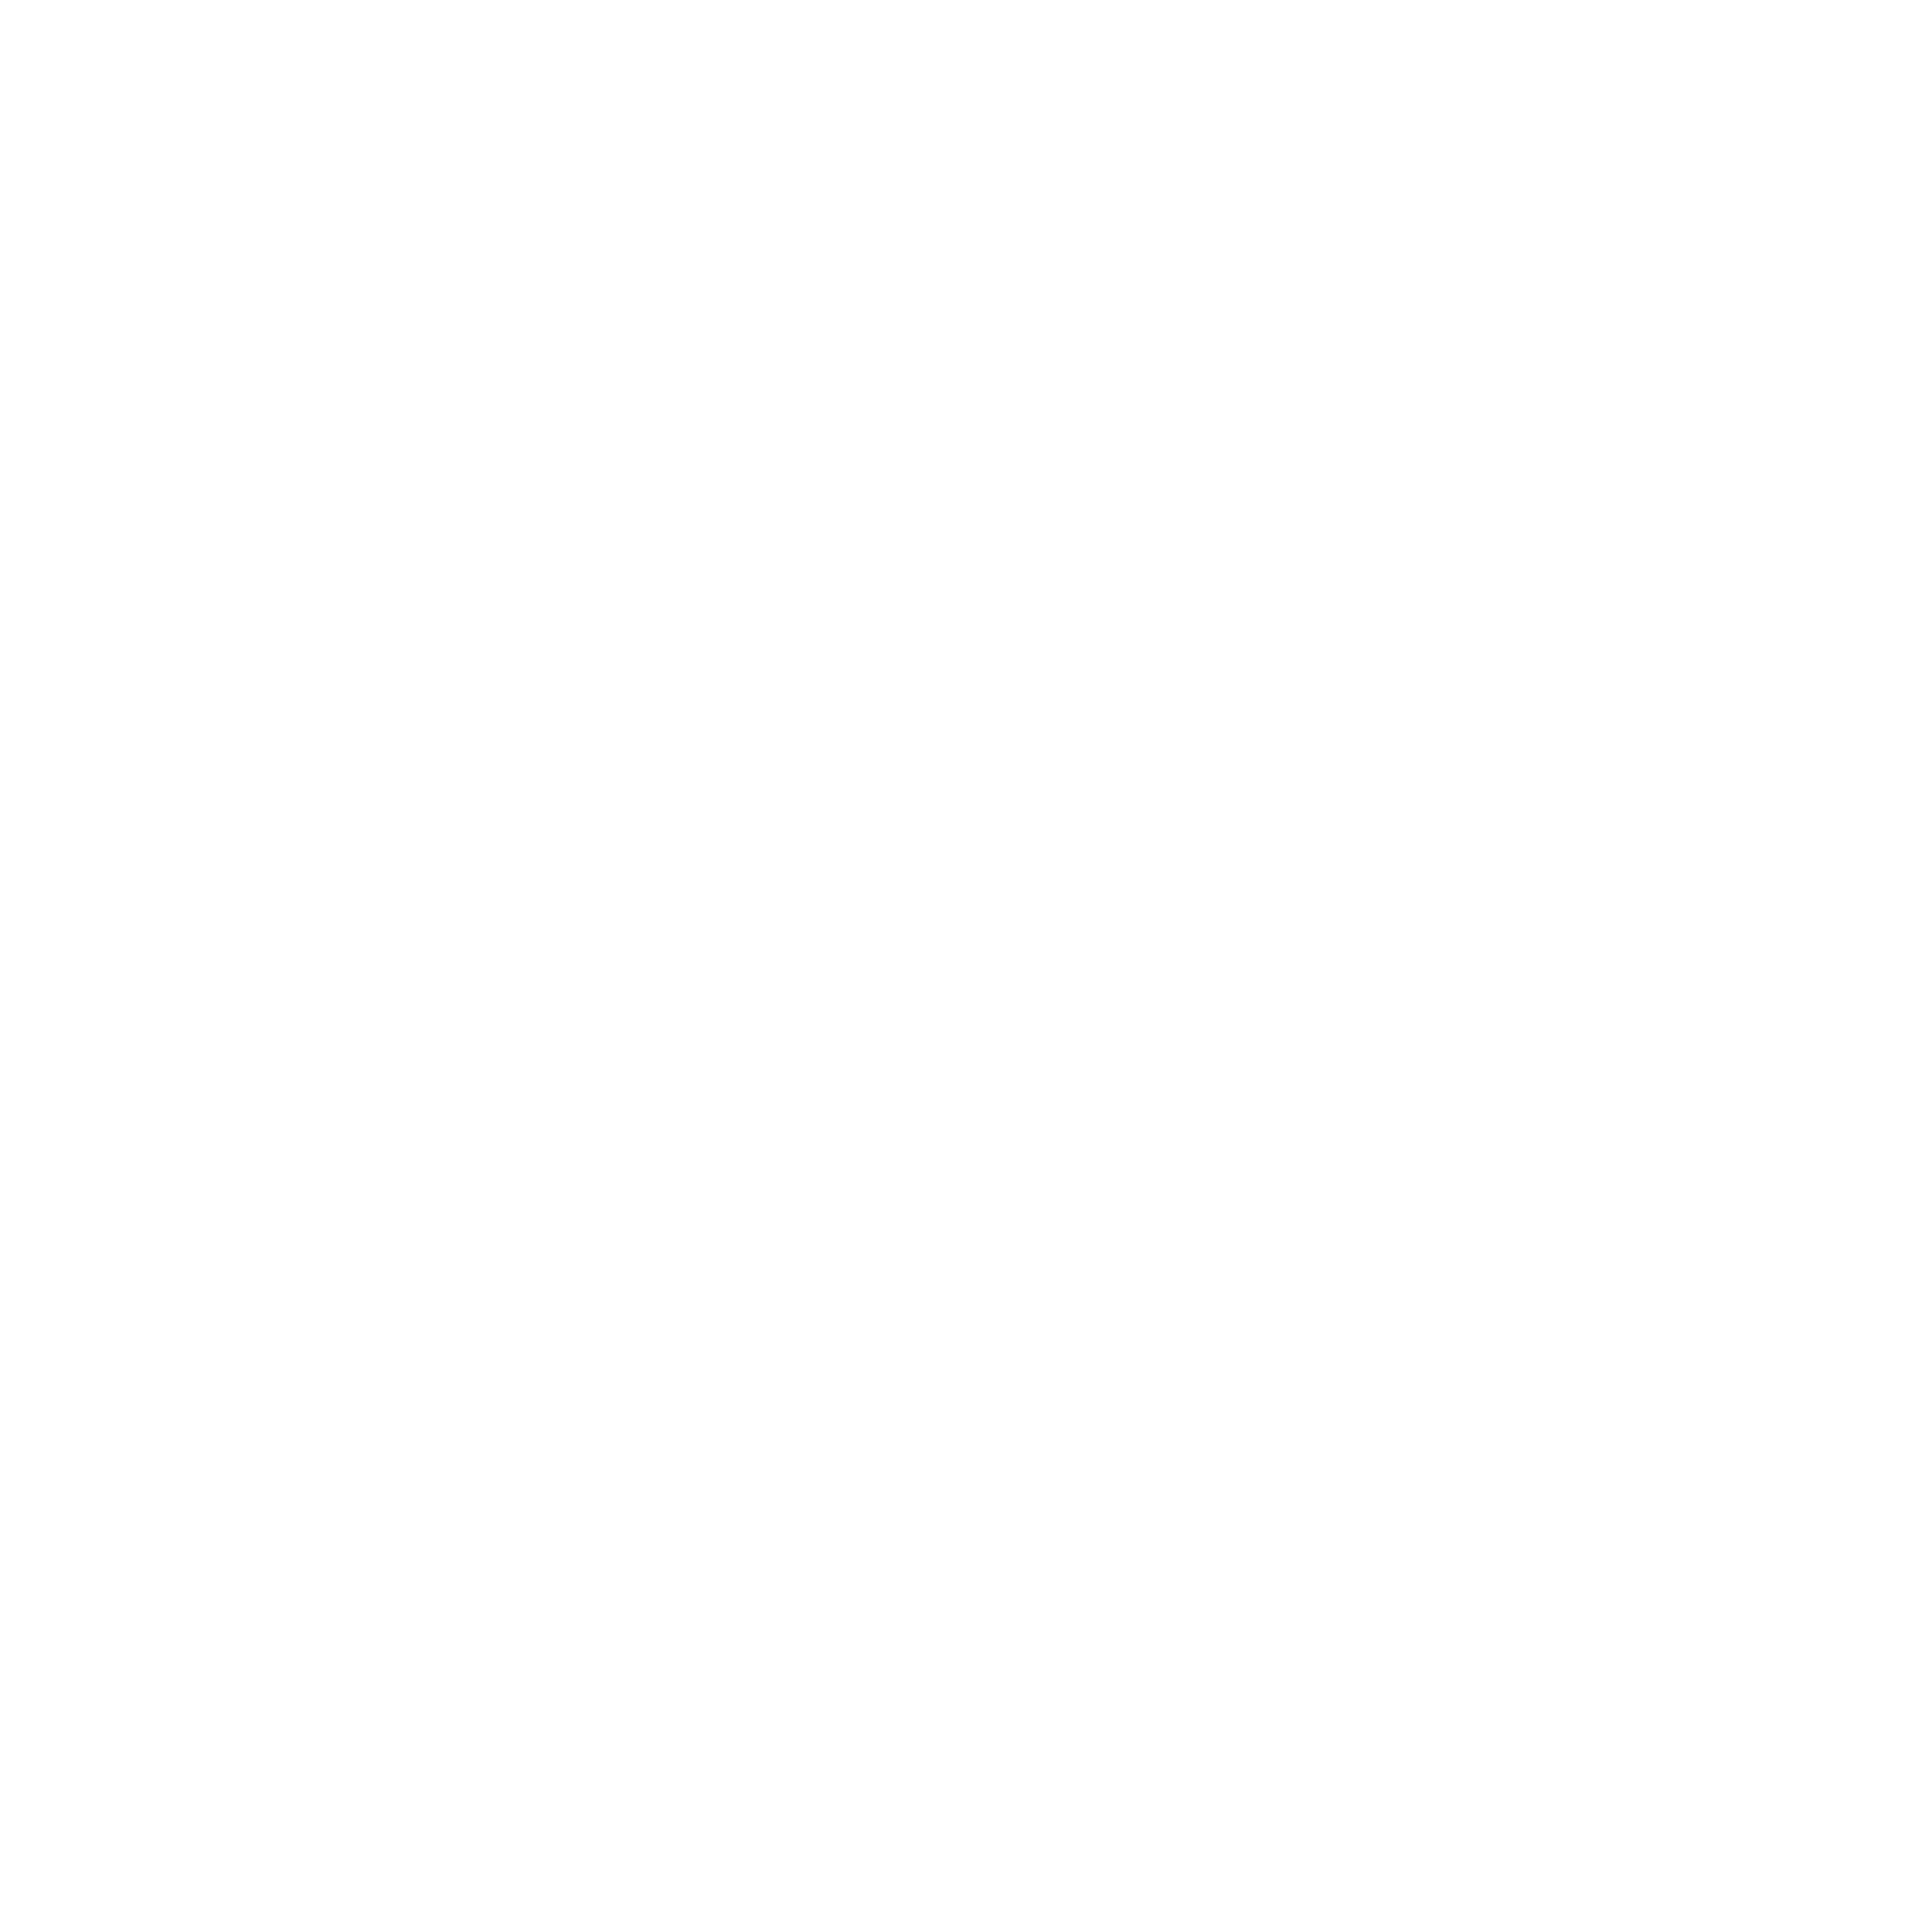

LinAlgError: singular matrix

In [29]:
sns.pairplot(dfESimplified.loc[:, dfESimplified.columns != 'ID'],hue = "Favorite feature")


<IPython.core.display.Javascript object>


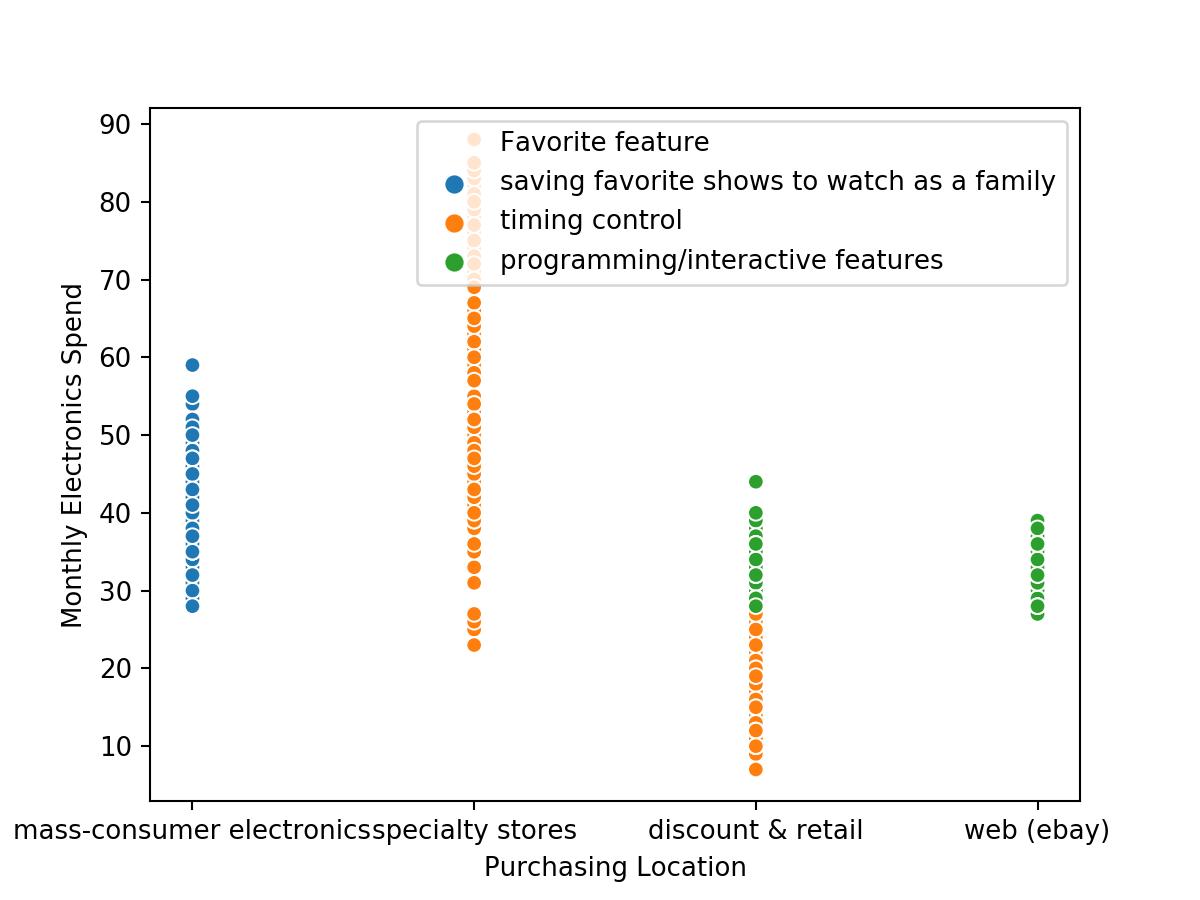

In [35]:
#sns.pairplot(dfESimplified.loc[:, dfESimplified.columns != 'ID'],hue = "Favorite feature")
%matplotlib notebook
sns.scatterplot(x="Purchasing Location", y="Monthly Electronics Spend", hue ="Favorite feature",data = dfSimplified)
plt.show()

# Segmenting by Purchasing Location and TV Viewing

In [20]:
# mass consumer
s1= dfSimplified.loc[(dfSimplified["Purchasing Location"] == "mass-consumer electronics")]
s2= dfSimplified.loc[(dfSimplified["Purchasing Location"] == "discount & retail") & (dfSimplified["Monthly Electronics Spend"] <= 26)]
s3= dfSimplified.loc[(dfSimplified["Purchasing Location"] == "discount & retail") & (dfSimplified["Monthly Electronics Spend"] > 26)]
s4= dfSimplified.loc[(dfSimplified["Purchasing Location"] == "specialty stores")]
s5= dfSimplified.loc[(dfSimplified["Purchasing Location"] == "web (ebay)")]


In [21]:
# summary of segments

print("S1: MASS CONSUMER ELECTRONICS")
print("MARKET SIZE: ",round(len(s1)/len(dfSimplified), 2))
print("MOST APPEALING FEATURE: ")
print("     ", s1["Favorite feature"].value_counts()/len(s1))
print("MONTHLY ELECTRONICS SPEND: ", round(s1["Monthly Electronics Spend"].mean(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s1["Technology Adoption"].value_counts()/len(s1))
print("TV VIEWING: ", round(s1["TV Viewing (hours/day)"].mean(),2))

print("______________")

print("S2: disc/ ret and low")
print("MARKET SIZE: ",round(len(s2)/len(dfSimplified), 2))
print("MOST APPEALING FEATURE: ")
print("     ", s2["Favorite feature"].value_counts()/len(s2))
print("MONTHLY ELECTRONICS SPEND: ", round(s2["Monthly Electronics Spend"].mean(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s2["Technology Adoption"].value_counts()/len(s2))
print("TV VIEWING: ", round(s2["TV Viewing (hours/day)"].mean(),2))

print("______________")

print("S3: disc/ ret and high")
print("MARKET SIZE: ",round(len(s3)/len(dfSimplified), 2))
print("MOST APPEALING FEATURE: ")
print("     ", s3["Favorite feature"].value_counts()/len(s3))
print("MONTHLY ELECTRONICS SPEND: ", round(s3["Monthly Electronics Spend"].mean(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s3["Technology Adoption"].value_counts()/len(s3))
print("TV VIEWING: ", round(s3["TV Viewing (hours/day)"].mean(),2))

print("______________")

print("S4: SPECIALTY")
print("MARKET SIZE: ",round(len(s4)/len(dfSimplified), 2))
print("MOST APPEALING FEATURE: ")
print("     ", s4["Favorite feature"].value_counts()/len(s4))
print("MONTHLY ELECTRONICS SPEND: ", round(s4["Monthly Electronics Spend"].mean(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s4["Technology Adoption"].value_counts()/len(s4))
print("TV VIEWING: ", round(s4["TV Viewing (hours/day)"].mean(),2))

print("______________")

print("S5: WEB (EBAY)")
print("MARKET SIZE: ",round(len(s5)/len(dfSimplified), 2))
print("MOST APPEALING FEATURE: ")
print("     ", s5["Favorite feature"].value_counts()/len(s5))
print("MONTHLY ELECTRONICS SPEND: ", round(s5["Monthly Electronics Spend"].mean(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s5["Technology Adoption"].value_counts()/len(s5))
print("TV VIEWING: ", round(s5["TV Viewing (hours/day)"].mean(),2))

print("______________")

S1: MASS CONSUMER ELECTRONICS
MARKET SIZE:  0.2
MOST APPEALING FEATURE: 
      saving favorite shows to watch as a family    1.0
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  41.4
TECHNOLOGY ADOPTION: 
      late    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  6.32
______________
S2: disc/ ret and low
MARKET SIZE:  0.5
MOST APPEALING FEATURE: 
      timing control                      0.996
programming/interactive features    0.004
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  16.89
TECHNOLOGY ADOPTION: 
      early    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  1.03
______________
S3: disc/ ret and high
MARKET SIZE:  0.09
MOST APPEALING FEATURE: 
      programming/interactive features    0.977011
timing control                      0.022989
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  33.11
TECHNOLOGY ADOPTION: 
      early    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  3.0
____

In [22]:
# homogeneity of segments

print("S1: MASS CONSUMER ELECTRONICS")
print("MOST APPEALING FEATURE: ")
print("     ", s1["Favorite feature"].value_counts()/len(s1))
print("MONTHLY ELECTRONICS SPEND: ", round(s1["Monthly Electronics Spend"].std(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s1["Technology Adoption"].value_counts()/len(s1))
print("TV VIEWING: ", round(s1["TV Viewing (hours/day)"].std(),2))

print("______________")

print("S2: disc/ ret and low")
print("MOST APPEALING FEATURE: ")
print("     ", s2["Favorite feature"].value_counts()/len(s2))
print("MONTHLY ELECTRONICS SPEND: ", round(s2["Monthly Electronics Spend"].std(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s2["Technology Adoption"].value_counts()/len(s2))
print("TV VIEWING: ", round(s2["TV Viewing (hours/day)"].std(),2))

print("______________")

print("S3: disc/ ret and high")
print("MOST APPEALING FEATURE: ")
print("     ", s3["Favorite feature"].value_counts()/len(s3))
print("MONTHLY ELECTRONICS SPEND: ", round(s3["Monthly Electronics Spend"].std(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s3["Technology Adoption"].value_counts()/len(s3))
print("TV VIEWING: ", round(s3["TV Viewing (hours/day)"].std(),2))

print("______________")

print("S4: SPECIALTY")
print("MOST APPEALING FEATURE: ")
print("     ", s4["Favorite feature"].value_counts()/len(s4))
print("MONTHLY ELECTRONICS SPEND: ", round(s4["Monthly Electronics Spend"].std(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s4["Technology Adoption"].value_counts()/len(s4))
print("TV VIEWING: ", round(s4["TV Viewing (hours/day)"].std(),2))

print("______________")

print("S5: WEB (EBAY)")
print("MOST APPEALING FEATURE: ")
print("     ", s5["Favorite feature"].value_counts()/len(s5))
print("MONTHLY ELECTRONICS SPEND: ", round(s5["Monthly Electronics Spend"].std(),2))
print("TECHNOLOGY ADOPTION: ")
print("     ", s5["Technology Adoption"].value_counts()/len(s5))
print("TV VIEWING: ", round(s5["TV Viewing (hours/day)"].std(),2))

print("______________")

S1: MASS CONSUMER ELECTRONICS
MOST APPEALING FEATURE: 
      saving favorite shows to watch as a family    1.0
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  5.61
TECHNOLOGY ADOPTION: 
      late    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  4.1
______________
S2: disc/ ret and low
MOST APPEALING FEATURE: 
      timing control                      0.996
programming/interactive features    0.004
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  3.08
TECHNOLOGY ADOPTION: 
      early    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  0.74
______________
S3: disc/ ret and high
MOST APPEALING FEATURE: 
      programming/interactive features    0.977011
timing control                      0.022989
Name: Favorite feature, dtype: float64
MONTHLY ELECTRONICS SPEND:  3.07
TECHNOLOGY ADOPTION: 
      early    1.0
Name: Technology Adoption, dtype: float64
TV VIEWING:  1.77
______________
S4: SPECIALTY
MOST APPEALING FEATURE: 
      t

count    168.000000
mean      58.279762
std       13.319171
min       23.000000
25%       49.000000
50%       59.000000
75%       67.000000
max       88.000000
Name: Monthly Electronics Spend, dtype: float64


Text(85,0.028,'std: 13.32')

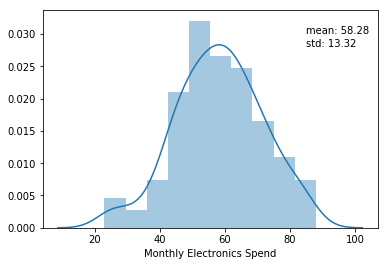

In [23]:
# s4
%matplotlib inline

print(s4["Monthly Electronics Spend"].describe())
sns.distplot(s4["Monthly Electronics Spend"])
plt.text(85,0.03,"mean: 58.28")
plt.text(85,0.028,"std: 13.32")

### Exploring Demographics of my segments